In [22]:
using Plots, Parameters, LaTeXStrings
include("CommunityDecline.jl")

# Environment 1 - A Single Community
While the ultimate goal is to include a Roback style spatial component into the model, the single community version is illustrative for the purpose of seeing how individuals select into self-employment. The two community case will come next.

### The Environment
Time is discrete. Suppose we have a population of individuals who are differentiated by their entrepreneurial ability. Let $g(z)$ denote the measure of individuals with managerial talent $z$ and $G(z)$ denote the corresponding cumulative measure.

Suppose that individual $z$ has access to a decreasing returns technology,
$$f(n;z) = e^{Az}n^\varphi,\quad0<\varphi<1,$$
where $n$ is labor input and $A$ is a local production amenity. We will also assume that each of these individuals is infinitely lived and risk-neutral. Their preferences are
$$u(c) = c.$$

Labor markets are frictional. The matching technology $M(u,v)$ is constant returns which allows us to express the vacancy fill rate as
$q(\theta)\equiv M(\theta^{-1},1)$ and the job finding rate as $\theta q(\theta)$. $\theta\equiv v/u$ denotes the local labor market's tightness.

### Occupational Selection
How will individuals select into self-employment? When an individual begins using her production technology, she starts out with no labor $n_0=0$. As a manager her "span of control" (Lucas, 1978) influences production through $z$ but not through labor $n$. That is, she is not counted in the labor she hires.

Consider the value for an unemployed worker,
$$V^u(z) = \max\bigg\{b + \theta q(\theta)(w - b + \beta V^e(z)),\quad J(0,z)\bigg\}.$$
This states that the value of unemployment for agent $z$ is the value of search or the value of starting a firm with the technology she has available, whichever is larger. To simplify matters, we assume that there is a single wage rate $w$ which satisfies a labor market clearing condition that we make explicit later.

The value of employment is given by,
$$V^e(z) = \delta V^u(z) + (1-\delta)\bigg[w + \beta V^e(z)\bigg].$$
Note that there is no endogenous separation because $z$ is not moving over time and we assume that a period of employment must be endured before starting a firm if the worker did separate.

Now consider the value of self-employment. All entrants into self-employment start with $n_0=0$ employees. The value of an entrant is given by $J(0,z)$ while that of an incumbent is $J(n,z)$. Firms growth their labor force by posting vacancies $v > 0$ and shrink their labor force by posting layoffs $v<0$. Posting $v>0$ is costly while posting $v<0$ is not. We represent this by $c(v)$ where $c(v)$ is assumed convex for
$v\geq0$ and constant at $0$ for $v\leq0$. A function that does the trick is
$$c(v) = \begin{cases}
0&&\text{if}&&v\leq0\\
\frac{\kappa}{2}v^2&&\text{if}&&v\geq0
\end{cases}$$


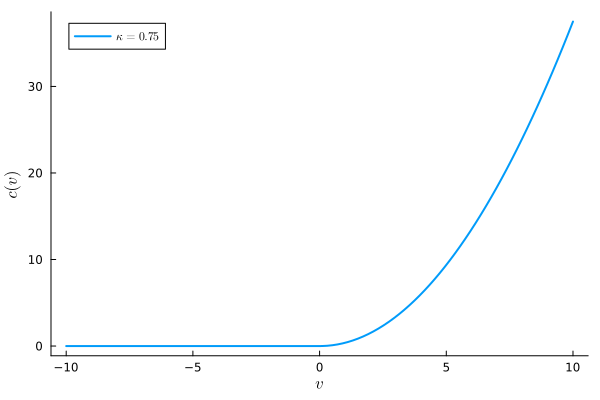

In [ ]:
function c(v::Float64;κ::Float64 = 0.75)
    if v < 0
        return 0
    else
        return κ/2 * v^2
    end
end

V = collect(range(-10,10,100))
C = [c(v) for v in V]
plot(V,C, lw = 2, label = L"\kappa = 0.75")
xgrid!(false)
ygrid!(false)
ylabel!(L"c(v)")
xlabel!(L"v")

How many vacancies should a manager post? When the manager enters the period with $n$ workers, she will lose $\delta n$ workers to the separation
shock. Her remaining workforce is of size $(1-\delta)n$. If she would like to achieve a workforce of size $\tilde n$, then she must account for the frictional labor market. That is,
$$\tilde n = q(\theta)v + (1-\delta)n\iff v = \frac{\tilde n - (1-\delta)n}{q(\theta)}$$

Thus, the problem facing the firm is,
$$
\begin{align*}
J(n,z) \quad &= \quad\max_{\tilde{n},v}\quad\bigg\{e^{Az}\tilde{n}^\varphi - c(v) - w\tilde n + \beta J(\tilde n, z)\bigg\}\quad\text{s.t.}\\
\tilde n &= q(\theta)v + (1-\delta)n
\end{align*}
$$